### LOADING DATA + ANALYSIS

In [208]:
import pandas as pd
import numpy as np
import nltk
import plotly.express as px

In [209]:
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [211]:
import yfinance as yf


tickers = ['AAPL','MSFT','AMZN','GOOG',
           'AMD','NVDA','TSLA','YELP',
           'NFLX','ADBE','BA','AIG']

start = '2010-01-01'
end = '2018-12-31'
df_ticker_return = pd.DataFrame()
for ticker in tickers:    
    ticker_yf = yf.Ticker(ticker)
    if df_ticker_return.empty:
        df_ticker_return = ticker_yf.history(start = start, end = end)
        df_ticker_return['ticker']= ticker 
    else:
        data_temp = ticker_yf.history(start = start, end = end)
        data_temp['ticker']= ticker 
        df_ticker_return = df_ticker_return.append(data_temp)

df_ticker_return['ticker'] = df_ticker_return['ticker'].replace({'META':'FB'})
print(df_ticker_return['ticker'].unique())

C:\Users\vika1\AppData\Local\Temp\ipykernel_9736\1916912168.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\vika1\AppData\Local\Temp\ipykernel_9736\1916912168.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\vika1\AppData\Local\Temp\ipykernel_9736\1916912168.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\vika1\AppData\Local\Temp\ipykernel_9736\1916912168.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\vika1\AppData\Local\Temp\ipykernel_9736\1916912168.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

['AAPL' 'MSFT' 'AMZN' 'GOOG' 'AMD' 'NVDA' 'TSLA' 'YELP' 'NFLX' 'ADBE' 'BA'
 'AIG']


C:\Users\vika1\AppData\Local\Temp\ipykernel_9736\1916912168.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [212]:
df_ticker_return.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-01-04 00:00:00-05:00,6.478689,6.511168,6.446816,6.496294,493729600,0.0,0.0,AAPL
2010-01-05 00:00:00-05:00,6.514205,6.544257,6.473225,6.507527,601904800,0.0,0.0,AAPL
2010-01-06 00:00:00-05:00,6.507526,6.533328,6.397337,6.404015,552160000,0.0,0.0,AAPL
2010-01-07 00:00:00-05:00,6.427691,6.435280,6.345732,6.392175,477131200,0.0,0.0,AAPL
2010-01-08 00:00:00-05:00,6.383676,6.435280,6.346036,6.434672,447610800,0.0,0.0,AAPL


In [213]:
tickers = list(df_ticker_return['ticker'].unique())
print(tickers)

['AAPL', 'MSFT', 'AMZN', 'GOOG', 'AMD', 'NVDA', 'TSLA', 'YELP', 'NFLX', 'ADBE', 'BA', 'AIG']


In [214]:
fig = px.line(df_ticker_return,y='Close',facet_col='ticker',
              facet_col_wrap=3,height=900,template='plotly_white')
fig.update_traces(line_color='#CDE10F', line_width=2)
fig.show(renderer='iframe')

In [215]:
df_ticker_return.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,26489.000000,26489.000000,26489.000000,26489.000000,2.648900e+04,26489.000000,26489.000000
mean,45.132659,45.659615,44.573186,45.132070,6.206270e+07,0.002226,0.000642
std,57.069360,57.753903,56.295148,57.041653,1.148318e+08,0.065577,0.062359
min,1.076000,1.108667,0.998667,1.053333,0.000000e+00,0.000000,0.000000
25%,13.352667,13.530000,13.171787,13.340000,6.156000e+06,0.000000,0.000000
50%,27.509972,27.854401,27.144772,27.512465,2.621200e+07,0.000000,0.000000
75%,51.820871,52.310001,51.238646,51.818199,6.782800e+07,0.000000,0.000000
max,421.380005,423.209991,413.079987,418.970001,1.880998e+09,8.700000,7.000000


In [216]:
df_ticker_return.isna().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
ticker          False
dtype: bool

In [217]:
fig1 = px.line(df_ticker_return['Close'])
fig1

In [218]:
df_news = pd.read_csv(r"C:\Users\vika1\headlines.csv")
df_news

,ticker,headline,date
0,DVA,Davita (NYSE:DVA): EPS of $0.96 beats by $0.01...,2011-05-02
1,CGNX,Cognex (NASDAQ:CGNX): EPS of $0.32 beats by $0...,2011-05-02
2,AEIS,Advanced Energy Industries (NASDAQ:AEIS):,2011-05-02
3,LOCM,Local.com (NASDAQ:LOCM):,2011-05-02
4,CYDEQ,CyberDefender (CYDE):,2011-05-02
...,...,...,...
122608,WAAS,Culligan will acquire AquaVenture (NYSE:WAAS) ...,2019-12-23
122609,SRPT,Sarepta Therapeutics (NASDAQ:SRPT) is up 13% p...,2019-12-23
122610,NaN,Wall Street futures are starting a holiday-sho...,2019-12-23
122611,BAYRY,Bayer (OTCPK:BAYRY) started the week up 3.5% t...,2019-12-23


In [219]:
df_news.isna().any()

ticker       True
headline     True
date        False
dtype: bool

In [220]:
data_news=df_news.dropna()

In [221]:
data_news.isna().any()

ticker      False
headline    False
date        False
dtype: bool

In [222]:
data_news['ticker'].nunique()

6931

In [223]:
data_news = df_news[~(df_news['ticker'] == '')]
data_news.shape

(122613, 3)

In [224]:
data_news['ticker'].value_counts()

TSLA     524
AAPL     509
AMZN     434
NFLX     379
PBR      365
        ... 
HAVSF      1
NWN        1
IWM        1
PRBCF      1
DEAC       1
Name: ticker, Length: 6939, dtype: int64

In [225]:
bar = px.bar(data_news['ticker'].value_counts()[:100])
bar

In [226]:
df_ticker_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26489 entries, 2010-01-04 00:00:00-05:00 to 2018-12-28 00:00:00-05:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          26489 non-null  float64
 1   High          26489 non-null  float64
 2   Low           26489 non-null  float64
 3   Close         26489 non-null  float64
 4   Volume        26489 non-null  int64  
 5   Dividends     26489 non-null  float64
 6   Stock Splits  26489 non-null  float64
 7   ticker        26489 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [227]:
df_ticker_return.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-01-04 00:00:00-05:00,6.478689,6.511168,6.446816,6.496294,493729600,0.0,0.0,AAPL
2010-01-05 00:00:00-05:00,6.514205,6.544257,6.473225,6.507527,601904800,0.0,0.0,AAPL
2010-01-06 00:00:00-05:00,6.507526,6.533328,6.397337,6.404015,552160000,0.0,0.0,AAPL
2010-01-07 00:00:00-05:00,6.427691,6.435280,6.345732,6.392175,477131200,0.0,0.0,AAPL
2010-01-08 00:00:00-05:00,6.383676,6.435280,6.346036,6.434672,447610800,0.0,0.0,AAPL


In [228]:
for col in df_ticker_return.columns:
    print(col)

Open
High
Low
Close
Volume
Dividends
Stock Splits
ticker


In [229]:
df_ticker_return.reset_index(level=0, inplace=True)

In [230]:
df_ticker_return['date'] = pd.to_datetime(df_ticker_return['Date']).apply(lambda x: x.date())

In [231]:
df_ticker_return.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,date
0,2010-01-04 00:00:00-05:00,6.478689,6.511168,6.446816,6.496294,493729600,0.0,0.0,AAPL,2010-01-04
1,2010-01-05 00:00:00-05:00,6.514205,6.544257,6.473225,6.507527,601904800,0.0,0.0,AAPL,2010-01-05
2,2010-01-06 00:00:00-05:00,6.507526,6.533328,6.397337,6.404015,552160000,0.0,0.0,AAPL,2010-01-06
3,2010-01-07 00:00:00-05:00,6.427691,6.435280,6.345732,6.392175,477131200,0.0,0.0,AAPL,2010-01-07
4,2010-01-08 00:00:00-05:00,6.383676,6.435280,6.346036,6.434672,447610800,0.0,0.0,AAPL,2010-01-08


In [232]:
df_ticker_return['ret_curr'] = df_ticker_return['Close'].pct_change()

#Computing the event return
# rtm1 = df_ticker_return['ret_curr'].shift(-1) # return a day before the news
rtp1 = df_ticker_return['ret_curr'].shift(1) # return a day after the news
rt = df_ticker_return['ret_curr'] # return the day of the news

df_ticker_return['eventRet'] =  rt + rtp1 

# df_ticker_return['date'] = pd.to_datetime(df_ticker_return['Date']).apply(lambda x: x.date())
# # df_ticker_return.drop(['Date'])

In [233]:
df_ticker_return.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,date,ret_curr,eventRet
0,2010-01-04 00:00:00-05:00,6.478689,6.511168,6.446816,6.496294,493729600,0.0,0.0,AAPL,2010-01-04,NaN,NaN
1,2010-01-05 00:00:00-05:00,6.514205,6.544257,6.473225,6.507527,601904800,0.0,0.0,AAPL,2010-01-05,0.001729,NaN
2,2010-01-06 00:00:00-05:00,6.507526,6.533328,6.397337,6.404015,552160000,0.0,0.0,AAPL,2010-01-06,-0.015906,-0.014177
3,2010-01-07 00:00:00-05:00,6.427691,6.435280,6.345732,6.392175,477131200,0.0,0.0,AAPL,2010-01-07,-0.001849,-0.017755
4,2010-01-08 00:00:00-05:00,6.383676,6.435280,6.346036,6.434672,447610800,0.0,0.0,AAPL,2010-01-08,0.006648,0.004799


In [234]:
data_news['date'] = pd.to_datetime(data_news['date']).apply(lambda x: x.date())
data_news.head()

,ticker,headline,date
0,DVA,Davita (NYSE:DVA): EPS of $0.96 beats by $0.01...,2011-05-02
1,CGNX,Cognex (NASDAQ:CGNX): EPS of $0.32 beats by $0...,2011-05-02
2,AEIS,Advanced Energy Industries (NASDAQ:AEIS):,2011-05-02
3,LOCM,Local.com (NASDAQ:LOCM):,2011-05-02
4,CYDEQ,CyberDefender (CYDE):,2011-05-02


In [235]:
df_ticker_return.isna().any()

Date            False
Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
ticker          False
date            False
ret_curr         True
eventRet         True
dtype: bool

In [236]:
df_all = pd.merge (df_ticker_return, data_news,
                  how='left',
                  left_on=['date','ticker'], 
                  right_on=['date','ticker'])

df_all = df_all[df_all['ticker'].isin(tickers)]
df_all = df_all[['ticker','headline','date','eventRet','Close']]
df_all = df_all.dropna()

df_all = df_all.reset_index(drop=True)

In [237]:
set1 = set(df_ticker_return[['date','ticker']].apply(lambda x: tuple(x),axis=1))

In [238]:
set1

{(datetime.date(2017, 6, 7), 'AAPL'),
 (datetime.date(2011, 4, 28), 'GOOG'),
 (datetime.date(2010, 9, 27), 'ADBE'),
 (datetime.date(2014, 2, 28), 'AMD'),
 (datetime.date(2017, 7, 13), 'MSFT'),
 (datetime.date(2014, 3, 18), 'MSFT'),
 (datetime.date(2015, 3, 20), 'GOOG'),
 (datetime.date(2015, 12, 10), 'AMD'),
 (datetime.date(2010, 11, 16), 'GOOG'),
 (datetime.date(2016, 9, 12), 'NFLX'),
 (datetime.date(2015, 5, 11), 'NVDA'),
 (datetime.date(2013, 3, 8), 'AMD'),
 (datetime.date(2011, 8, 23), 'BA'),
 (datetime.date(2012, 11, 26), 'AAPL'),
 (datetime.date(2016, 11, 10), 'AMD'),
 (datetime.date(2015, 8, 26), 'BA'),
 (datetime.date(2012, 5, 15), 'NVDA'),
 (datetime.date(2011, 8, 24), 'BA'),
 (datetime.date(2012, 1, 19), 'AMZN'),
 (datetime.date(2010, 6, 25), 'NVDA'),
 (datetime.date(2011, 12, 29), 'NVDA'),
 (datetime.date(2017, 10, 25), 'NFLX'),
 (datetime.date(2010, 8, 12), 'AMZN'),
 (datetime.date(2012, 7, 18), 'MSFT'),
 (datetime.date(2016, 12, 2), 'MSFT'),
 (datetime.date(2015, 11, 24), 

In [239]:
set2 =set(data_news[['date','ticker']].apply(lambda x: tuple(x),axis=1))


In [240]:
set2

{(datetime.date(2016, 12, 7), nan),
 (datetime.date(2013, 5, 3), 'SPEX'),
 (datetime.date(2018, 4, 11), 'ZS'),
 (datetime.date(2019, 3, 18), 'ACRS'),
 (datetime.date(2014, 4, 9), 'BUD'),
 (datetime.date(2015, 3, 18), 'RASF'),
 (datetime.date(2011, 5, 31), 'GS'),
 (datetime.date(2014, 12, 9), 'AKAO'),
 (datetime.date(2012, 4, 25), 'TWI'),
 (datetime.date(2019, 10, 28), 'GOOG'),
 (datetime.date(2012, 4, 20), 'MAN'),
 (datetime.date(2015, 10, 8), 'NBIX'),
 (datetime.date(2013, 8, 8), 'CHU'),
 (datetime.date(2014, 3, 18), 'MSFT'),
 (datetime.date(2016, 12, 20), 'AKBA'),
 (datetime.date(2017, 9, 29), 'JBHT'),
 (datetime.date(2013, 8, 14), 'VIPS'),
 (datetime.date(2013, 5, 10), 'UBNT'),
 (datetime.date(2012, 5, 16), 'CP'),
 (datetime.date(2016, 8, 10), 'DNR'),
 (datetime.date(2014, 10, 22), 'WYY'),
 (datetime.date(2018, 1, 9), 'TMUS'),
 (datetime.date(2017, 10, 13), 'QCOM'),
 (datetime.date(2014, 6, 26), 'NLY'),
 (datetime.date(2013, 5, 17), 'VTNR'),
 (datetime.date(2015, 4, 20), 'HAR'),
 (d

In [241]:
df_all

,ticker,headline,date,eventRet,Close
0,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.033473,10.079107
1,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.020029,10.091248
2,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,-0.030495,9.571568
3,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.022133,10.842840
4,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.011365,10.867734
...,...,...,...,...,...
3137,AIG,Investors may fret over AIG's reinsurance expo...,2018-01-22,-0.008611,52.301777
3138,AIG,The sell-side is taking the rough headline mis...,2018-02-09,-0.002929,51.633003
3139,AIG,Declining returns on the RMBS portfolio is the...,2018-03-08,-0.030554,48.246246
3140,AIG,Q1 adjusted income of $963M or $1.04 per share...,2018-05-02,-0.020570,47.290680


### SENTIMENT EVALUATION

In [242]:
df_all['sent_blob'] = df_all['headline'].apply(lambda row: TextBlob(row).sentiment.polarity)
df_all.head()

,ticker,headline,date,eventRet,Close,sent_blob
0,AAPL,Despite a wave of analyst love regarding yeste...,2011-06-07,-0.033473,10.079107,0.020000
1,AAPL,Bill Ackman's hedge fund made ~$490M in one da...,2011-06-14,0.020029,10.091248,0.000000
2,AAPL,Apple (AAPL -1.5%) shares continue their perpl...,2011-06-20,-0.030495,9.571568,-0.000794
3,AAPL,"After lagging for months, tech bellwethers App...",2011-07-07,0.022133,10.842840,-0.022222
4,AAPL,"Looking at a ""refresh of virtually every produ...",2011-07-13,0.011365,10.867734,0.248611


In [272]:
# saving dataframe
df_all.to_csv('data_for_prediction.csv')

In [243]:
fig = px.scatter(df_all,x='sent_blob',y='eventRet',
                 facet_col='ticker',facet_col_wrap=3,
                 template='plotly_white',
                 width=None,height=1000,
                 title='event return & textblop sentiment scatter plot')

fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  opacity=0.3,
                  selector=dict(mode='markers'))

fig.show(renderer='iframe')

In [244]:
fig = px.scatter(df_all,x='Close',y='eventRet',
                 facet_col='ticker',facet_col_wrap=3,
                 template='plotly_white',
                 width=None,height=1000,
                 title='event return & close_price sentiment scatter plot')

fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  opacity=0.3,
                  selector=dict(mode='markers'))

fig.show(renderer='iframe')

In [245]:
df_all.dtypes

ticker        object
headline      object
date          object
eventRet     float64
Close        float64
sent_blob    float64
dtype: object

In [246]:
list(df_all.columns)

['ticker', 'headline', 'date', 'eventRet', 'Close', 'sent_blob']

In [247]:
df_all['eventRet'] = pd.to_numeric(df_all['eventRet'])

In [248]:

ticker_dict = dict(tuple(df_all.groupby('ticker')))

lst_corrs = []; lst_keys = []
for key,value in ticker_dict.items():
    corr_val = ticker_dict[key]['sent_blob'].corr(ticker_dict[key]['eventRet'])
    lst_keys.append(key)
    lst_corrs.append(round(corr_val,3))
    
    
ddf = pd.DataFrame(zip(lst_keys,lst_corrs))
ddf.columns = ['ticker','corr']
    
fig = px.bar(ddf,x='ticker',y='corr',template='plotly_white',
             width=None,height=400,title='event & sentiment correlation')

fig.show(renderer='iframe')

In [249]:
ticker_dict = dict(tuple(df_all.groupby('ticker')))

lst_corrs = []; lst_keys = []
for key,value in ticker_dict.items():
    corr_val = ticker_dict[key]['Close'].corr(ticker_dict[key]['eventRet'])
    lst_keys.append(key)
    lst_corrs.append(round(corr_val,3))
    
    
ddf = pd.DataFrame(zip(lst_keys,lst_corrs))
ddf.columns = ['ticker','corr']
    
fig = px.bar(ddf,x='ticker',y='corr',template='plotly_white',
             width=None,height=400,title='event & close_price correlation')

fig.show(renderer='iframe')

In [250]:


# задача крассификации: вверх или вниз - решающие деревья, cnn сравнение
# ансабль: градиентный бустинг
# все-таки можно регрессию (с ошибкой)
# сделать оценку моделей в R или еще какие-то графики + статистику 

### DATA PREPROCCESSING

In [251]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [252]:
from string import punctuation 

df_all["headline"] = df_all["headline"].apply(lambda x: x.lower().strip(punctuation).split()) 

df_all["headline"]

0       [despite, a, wave, of, analyst, love, regardin...
1       [bill, ackman's, hedge, fund, made, ~$490m, in...
2       [apple, (aapl, -1.5%), shares, continue, their...
3       [after, lagging, for, months,, tech, bellwethe...
4       [looking, at, a, "refresh, of, virtually, ever...
                              ...                        
3137    [investors, may, fret, over, aig's, reinsuranc...
3138    [the, sell-side, is, taking, the, rough, headl...
3139    [declining, returns, on, the, rmbs, portfolio,...
3140    [q1, adjusted, income, of, $963m, or, $1.04, p...
3141    [capital, one, (nyse:cof), +3%, in, morning, t...
Name: headline, Length: 3142, dtype: object

In [253]:
fig = px.scatter(df_all['eventRet'])
fig

### Headlines vectorisation

In [254]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [255]:
input_text = list(df_all.headline.values)                   

In [256]:
input_text[9]

['apple',
 '(aapl',
 '+3.6%)',
 'passes',
 'exxon',
 'mobil',
 '(xom',
 '-0.3%)',
 'as',
 'the',
 "world's",
 'largest',
 'market',
 'cap,',
 'breaking',
 'through',
 'the',
 '$350b',
 'barrier.',
 'but',
 "that's",
 'just',
 "child's",
 'play',
 'says',
 'one',
 'tech',
 'writer',
 'who',
 'makes',
 'the',
 'case',
 'for',
 'a',
 '+$1t',
 'market',
 'cap',
 'for',
 'the',
 'cupertino',
 'giant']

In [257]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_text)]

In [258]:
documents[9]

TaggedDocument(words=['apple', '(aapl', '+3.6%)', 'passes', 'exxon', 'mobil', '(xom', '-0.3%)', 'as', 'the', "world's", 'largest', 'market', 'cap,', 'breaking', 'through', 'the', '$350b', 'barrier.', 'but', "that's", 'just', "child's", 'play', 'says', 'one', 'tech', 'writer', 'who', 'makes', 'the', 'case', 'for', 'a', '+$1t', 'market', 'cap', 'for', 'the', 'cupertino', 'giant'], tags=[9])

In [259]:
model_D2V = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [260]:
model_D2V.dv[documents[999].tags[0]]

array([-0.03346118,  0.26524028,  0.21044953, -0.49902797,  0.198526  ],
      dtype=float32)

In [261]:
vectors = []
for x in documents:
    vec = list(model_D2V.dv[x.tags][0])
    vectors.append(vec)

In [262]:
split_df = pd.DataFrame(vectors,
                        columns=['v1', 'v2', 'v3','v4',"v5"])

split_df

,v1,v2,v3,v4,v5
0,0.049566,0.394584,0.305182,-0.891515,0.328524
1,0.155368,0.203335,0.205438,-0.835017,0.150085
2,0.245798,0.594914,0.458014,-0.984112,0.136181
3,-0.077581,0.374485,0.551228,-1.037769,0.165271
4,0.050155,0.627331,0.335080,-0.946706,0.399991
...,...,...,...,...,...
3137,0.054014,0.554362,0.434882,-1.086354,0.002037
3138,-0.042646,0.375547,0.243485,-0.730741,0.072771
3139,0.285389,0.455881,0.177957,-0.796433,0.080298
3140,0.166829,0.514478,0.288237,-0.589573,-0.060180


In [263]:
data= df_all.join(split_df, how='left')
print(data.shape)
data.head()

(3142, 11)


,ticker,headline,date,eventRet,Close,sent_blob,v1,v2,v3,v4,v5
0,AAPL,"[despite, a, wave, of, analyst, love, regardin...",2011-06-07,-0.033473,10.079107,0.020000,0.049566,0.394584,0.305182,-0.891515,0.328524
1,AAPL,"[bill, ackman's, hedge, fund, made, ~$490m, in...",2011-06-14,0.020029,10.091248,0.000000,0.155368,0.203335,0.205438,-0.835017,0.150085
2,AAPL,"[apple, (aapl, -1.5%), shares, continue, their...",2011-06-20,-0.030495,9.571568,-0.000794,0.245798,0.594914,0.458014,-0.984112,0.136181
3,AAPL,"[after, lagging, for, months,, tech, bellwethe...",2011-07-07,0.022133,10.842840,-0.022222,-0.077581,0.374485,0.551228,-1.037769,0.165271
4,AAPL,"[looking, at, a, ""refresh, of, virtually, ever...",2011-07-13,0.011365,10.867734,0.248611,0.050155,0.627331,0.335080,-0.946706,0.399991


### let's create two dataframes: ticker_id and features

In [264]:
data.ticker.unique()

array(['AAPL', 'MSFT', 'AMZN', 'GOOG', 'AMD', 'NVDA', 'TSLA', 'YELP',
       'NFLX', 'ADBE', 'BA', 'AIG'], dtype=object)

In [265]:
data['id'] = data.groupby(['ticker']).ngroup()
data.head()

,ticker,headline,date,eventRet,Close,sent_blob,v1,v2,v3,v4,v5,id
0,AAPL,"[despite, a, wave, of, analyst, love, regardin...",2011-06-07,-0.033473,10.079107,0.020000,0.049566,0.394584,0.305182,-0.891515,0.328524,0
1,AAPL,"[bill, ackman's, hedge, fund, made, ~$490m, in...",2011-06-14,0.020029,10.091248,0.000000,0.155368,0.203335,0.205438,-0.835017,0.150085,0
2,AAPL,"[apple, (aapl, -1.5%), shares, continue, their...",2011-06-20,-0.030495,9.571568,-0.000794,0.245798,0.594914,0.458014,-0.984112,0.136181,0
3,AAPL,"[after, lagging, for, months,, tech, bellwethe...",2011-07-07,0.022133,10.842840,-0.022222,-0.077581,0.374485,0.551228,-1.037769,0.165271,0
4,AAPL,"[looking, at, a, ""refresh, of, virtually, ever...",2011-07-13,0.011365,10.867734,0.248611,0.050155,0.627331,0.335080,-0.946706,0.399991,0


In [266]:
ticker_id = data[['id','ticker']]
ticker_id.head(5)

,id,ticker
0,0,AAPL
1,0,AAPL
2,0,AAPL
3,0,AAPL
4,0,AAPL


In [267]:
features = data[['Close','eventRet',"v1","v2","v3","v4","v5"]]
features.head(5)

,Close,eventRet,v1,v2,v3,v4,v5
0,10.079107,-0.033473,0.049566,0.394584,0.305182,-0.891515,0.328524
1,10.091248,0.020029,0.155368,0.203335,0.205438,-0.835017,0.150085
2,9.571568,-0.030495,0.245798,0.594914,0.458014,-0.984112,0.136181
3,10.842840,0.022133,-0.077581,0.374485,0.551228,-1.037769,0.165271
4,10.867734,0.011365,0.050155,0.627331,0.335080,-0.946706,0.399991


### Splitting the data

In [268]:
X = features.drop(["Close"],axis=1) 
y = data["Close"]

X.head()

,eventRet,v1,v2,v3,v4,v5
0,-0.033473,0.049566,0.394584,0.305182,-0.891515,0.328524
1,0.020029,0.155368,0.203335,0.205438,-0.835017,0.150085
2,-0.030495,0.245798,0.594914,0.458014,-0.984112,0.136181
3,0.022133,-0.077581,0.374485,0.551228,-1.037769,0.165271
4,0.011365,0.050155,0.627331,0.335080,-0.946706,0.399991


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# посмотрим на размерности
print(f"X_train shape:{X_train.shape},\
      X_test shape:{X_test.shape}")

X_train shape:(2356, 6),      X_test shape:(786, 6)


In [270]:
print(f"y_train shape:{y_train.shape},\
      y_test shape:{y_test.shape}")

y_train shape:(2356,),      y_test shape:(786,)


### регрессионная модель

In [105]:
regressor_1 = Ridge(alpha=5) 
regressor_1.fit(X_train, y_train)

Ridge(alpha=5)

In [106]:
y_preds = regressor_1.predict(X_test)

In [109]:
from sklearn import metrics

In [172]:
mse_reg = mean_squared_error(y_test, y_preds)
rmse_reg = mse_reg**(1/2.0)
print("MSE: ", mse_reg)
print("RMSE: ", rmse_reg) 

MSE:  3058.901371812403
RMSE:  55.307335605798286


In [111]:
r_squared = regressor_1. score (X, y)
r_squared

0.033379228102522585

### решающие деревья

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
tree_reg = DecisionTreeRegressor()

In [115]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [123]:
score = tree_reg.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 1.0


In [116]:
tree_y_pred = tree_reg.predict(X_test)

In [152]:
mse_tree = mean_squared_error(y_test, tree_y_pred)
rmse_tree = mse_tree**(1/2.0)
print("MSE: ", mse_tree)
print("RMSE: ", rmse_tree) 

MSE:  7292.521849735076
RMSE:  85.3962636754974


In [147]:
r_squared = tree_reg. score (X, y)
r_squared

0.43094006619864944

### ансамбли: Bagging

In [124]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=500, verbose=1)

In [125]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.5s finished


RandomForestRegressor(n_estimators=500, verbose=1)

In [148]:
score_ens = forest.score(X, y)
print("R-squared:", score) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R-squared: 1.0


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


In [126]:
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [127]:
len(forest_y_pred)

786

In [151]:
mse_for = mean_squared_error(y_test, forest_y_pred)
rmse_for = mse_for**(1/2.0)
print("MSE: ", mse_for)
print("RMSE: ", rmse_for) 

MSE:  3128.3510906862357
RMSE:  55.93166447269593


### ансамбли: Boosting

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
GradientBoost = GradientBoostingRegressor(n_estimators=1000,random_state=10, verbose=10)

In [140]:
GradientBoost.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        3179.4094            7.04s
         2        3149.1042            5.78s
         3        3121.5301            5.44s
         4        3099.6756            5.08s
         5        3077.9759            4.85s
         6        3058.3923            4.53s
         7        3041.8781            4.64s
         8        3026.2696            4.56s
         9        3010.4706            4.38s
        10        2996.6150            4.34s
        11        2978.4680            4.21s
        12        2963.6763            4.26s
        13        2942.7364            4.23s
        14        2925.2845            4.21s
        15        2908.1588            4.18s
        16        2898.2381            4.16s
        17        2870.3966            4.14s
        18        2862.0396            4.07s
        19        2850.8018            4.00s
        20        2835.5920            4.00s
        21        2814.8607            3.94s
        2

       219        1446.8122            2.67s
       220        1446.2425            2.67s
       221        1443.0885            2.67s
       222        1431.9827            2.66s
       223        1428.8464            2.66s
       224        1423.6949            2.66s
       225        1421.5825            2.65s
       226        1420.6663            2.65s
       227        1416.2284            2.65s
       228        1408.5623            2.65s
       229        1402.5511            2.64s
       230        1393.3705            2.65s
       231        1390.1606            2.65s
       232        1388.7969            2.65s
       233        1386.1233            2.65s
       234        1383.7060            2.65s
       235        1381.4921            2.64s
       236        1378.0164            2.64s
       237        1377.1402            2.64s
       238        1371.1683            2.63s
       239        1364.3479            2.63s
       240        1359.0025            2.63s
       241

       433         827.3039            1.96s
       434         827.1071            1.96s
       435         826.6717            1.95s
       436         824.8835            1.95s
       437         821.5645            1.95s
       438         819.4222            1.94s
       439         818.8007            1.94s
       440         818.2752            1.94s
       441         816.3380            1.93s
       442         815.2402            1.93s
       443         814.6176            1.93s
       444         812.1949            1.92s
       445         808.1060            1.92s
       446         806.2144            1.92s
       447         805.3316            1.91s
       448         802.4032            1.91s
       449         802.1793            1.91s
       450         800.4747            1.90s
       451         798.7476            1.90s
       452         797.1074            1.89s
       453         793.3312            1.89s
       454         791.5272            1.89s
       455

       664         536.4657            1.15s
       665         535.7240            1.14s
       666         534.9939            1.14s
       667         533.5065            1.14s
       668         533.0659            1.13s
       669         532.4556            1.13s
       670         531.7973            1.13s
       671         531.0019            1.12s
       672         530.8482            1.12s
       673         529.7994            1.11s
       674         528.1681            1.11s
       675         525.4965            1.11s
       676         524.8425            1.10s
       677         523.1837            1.10s
       678         521.9099            1.10s
       679         520.5857            1.09s
       680         519.9199            1.09s
       681         519.1577            1.09s
       682         516.5130            1.08s
       683         515.7429            1.08s
       684         514.6049            1.08s
       685         514.5408            1.07s
       686

       888         376.9504            0.38s
       889         376.4562            0.38s
       890         375.9046            0.37s
       891         375.1486            0.37s
       892         374.8034            0.37s
       893         374.6909            0.36s
       894         374.3784            0.36s
       895         374.0558            0.36s
       896         373.9306            0.35s
       897         373.1950            0.35s
       898         372.3678            0.35s
       899         371.5408            0.34s
       900         370.6047            0.34s
       901         370.0513            0.34s
       902         368.8870            0.33s
       903         368.2462            0.33s
       904         367.8242            0.33s
       905         367.5335            0.32s
       906         367.3574            0.32s
       907         366.9757            0.32s
       908         366.9011            0.31s
       909         365.8547            0.31s
       910

GradientBoostingRegressor(n_estimators=1000, random_state=10, verbose=10)

In [141]:
grd_y_pred = GradientBoost.predict(X_test)

In [142]:
len(grd_y_pred)

786

In [150]:
mse_grd = mean_squared_error(y_test, grd_y_pred)
rmse_grd = mse_grd**(1/2.0)
print("MSE: ", mse_grd)
print("RMSE: ", rmse_grd) 

MSE:  3418.7374581315357
RMSE:  58.46997056721968


### KNN-Regression

In [155]:
from sklearn import neighbors
from math import sqrt

In [167]:
rmse_knn = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn_regr = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_regr.fit(X_train, y_train)
    
    pred=knn_regr.predict(X_test) #make prediction on test set
    
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_knn.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 79.74066874450634
RMSE value for k=  2 is: 70.54167248658382
RMSE value for k=  3 is: 64.28666423791869
RMSE value for k=  4 is: 62.11392379281526
RMSE value for k=  5 is: 60.45514121758751
RMSE value for k=  6 is: 59.62148482705117
RMSE value for k=  7 is: 59.08320839391555
RMSE value for k=  8 is: 58.316689697778486
RMSE value for k=  9 is: 57.78974586659478
RMSE value for k=  10 is: 57.60445856009817
RMSE value for k=  11 is: 57.450548325440096
RMSE value for k=  12 is: 57.147968958460915
RMSE value for k=  13 is: 57.18534861481356
RMSE value for k=  14 is: 57.117848414117496
RMSE value for k=  15 is: 57.03372189769173
RMSE value for k=  16 is: 56.87556563856262
RMSE value for k=  17 is: 56.464175531441605
RMSE value for k=  18 is: 56.39704610479073
RMSE value for k=  19 is: 56.14439909440376
RMSE value for k=  20 is: 56.09579611860012


<AxesSubplot:>

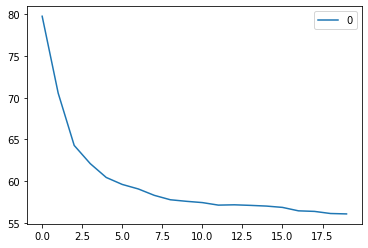

In [168]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [204]:
rmse_metric = [rmse_reg, rmse_tree, rmse_for, rmse_grd, min(rmse_knn)]
rmse_metric

[55.307335605798286,
 85.3962636754974,
 55.93166447269593,
 58.46997056721968,
 56.09579611860012]

In [273]:
models=['regression','DecisionTree','RandomForest','GradientBoosting','KNN-Regression']
df_rmse = pd.DataFrame(list(zip(models,rmse_metric)))
df_rmse

,0,1
0,regression,55.307336
1,DecisionTree,85.396264
2,RandomForest,55.931664
3,GradientBoosting,58.469971
4,KNN-Regression,56.095796


In [274]:
ddf = pd.DataFrame(zip(models,rmse_metric))
ddf.columns = ['models','metric']
    
fig = px.bar(ddf,x='models',y='metric',template='plotly_white',
             width=None,height=400,title='models & RMSE result')

fig.show(renderer='iframe')